In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from google.colab import drive
#drive.mount('./content')

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

# 1. EDA를 위한 데이터 불러오기 및 합치기
- 데이터프레임의 형태를 확인
- 5개의 파일을 '고객 ID', '거래 날짜'를 활용하여 Inner Join
- 하나의 csv 파일로 저장

In [ ]:
Customer = pd.read_csv('/content/drive/MyDrive/DACON/Customer_info.csv', index_col = 0)
Discount = pd.read_csv('/content/drive/MyDrive/DACON/Discount_info.csv', index_col = 0)
Marketing = pd.read_csv('/content/drive/MyDrive/DACON/Marketing_info.csv', index_col = 0)
Online = pd.read_csv('/content/drive/MyDrive/DACON/Onlinesales_info.csv', index_col = 0)
Tax = pd.read_csv('/content/drive/MyDrive/DACON/Tax_info.csv', index_col = 0)



Customer = Customer.reset_index()
Discount = Discount.reset_index()
Marketing = Marketing.reset_index()
Online = Online.reset_index()
Tax = Tax.reset_index()

In [ ]:
Customer.head()

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49


In [ ]:
Online.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used


In [ ]:
result_df = pd.merge(Online, Customer, on='고객ID', how='inner')

In [ ]:
result_df.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,남,Chicago,12
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,남,Chicago,12
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,남,Chicago,12


In [ ]:
result_df.rename(columns={'거래날짜':'날짜'},inplace=True)
result_df.head()

,고객ID,거래ID,날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,남,Chicago,12
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,남,Chicago,12
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,남,Chicago,12


In [ ]:
result_df.head()

,고객ID,거래ID,날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,남,Chicago,12
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,남,Chicago,12
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,남,Chicago,12


In [ ]:
result_df = pd.merge(result_df, Marketing, on= '날짜', how='inner')

In [ ]:
result_df.head()

,고객ID,거래ID,날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,오프라인비용,온라인비용
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,4500,2424.5
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,4500,2424.5
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,남,Chicago,12,4500,2424.5
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,남,Chicago,12,4500,2424.5
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,남,Chicago,12,4500,2424.5


In [ ]:
result_df = pd.merge(result_df, Tax, on= '제품카테고리', how='inner')

In [ ]:
result_df.head()
#GST : 제품카테고리 별 세율

,고객ID,거래ID,날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,오프라인비용,온라인비용,GST
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,4500,2424.5,0.1
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,4500,2424.5,0.1
2,USER_1358,Transaction_0013,2019-01-01,Product_0983,Nest-USA,2,122.77,6.5,Not Used,남,Chicago,12,4500,2424.5,0.1
3,USER_1358,Transaction_0015,2019-01-01,Product_0984,Nest-USA,1,81.50,6.5,Clicked,남,Chicago,12,4500,2424.5,0.1
4,USER_1358,Transaction_0016,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Clicked,남,Chicago,12,4500,2424.5,0.1


In [ ]:
print(result_df.dtypes)
#날짜가 날짜형식으로 되어있지 않음을 확인

고객ID       object
거래ID       object
날짜         object
제품ID       object
제품카테고리     object
수량          int64
평균금액      float64
배송료       float64
쿠폰상태       object
성별         object
고객지역       object
가입기간        int64
오프라인비용      int64
온라인비용     float64
GST       float64
dtype: object


In [ ]:
#'날짜' 열을 daterime 으로 변환
result_df['날짜'] = pd.to_datetime(result_df['날짜'], errors='coerce')

# 'Month' 열을 생성하여 월 정보를 담기
result_df['Month'] = result_df['날짜'].dt.month


In [ ]:
for i in range(len(result_df)):
    if result_df.at[i, 'Month'] == 1:
        result_df.at[i, 'Month'] = 'Jan'
    elif result_df.at[i, 'Month'] == 2:
        result_df.at[i, 'Month'] = 'Feb'
    elif result_df.at[i, 'Month'] == 3:
        result_df.at[i, 'Month'] = 'Mar'

In [ ]:
result_df.rename(columns={'Month':'월'},inplace=True)
result_df

,고객ID,거래ID,날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,오프라인비용,온라인비용,GST,월
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12,4500,2424.50,0.1,Jan
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12,4500,2424.50,0.1,Jan
2,USER_1358,Transaction_0013,2019-01-01,Product_0983,Nest-USA,2,122.77,6.50,Not Used,남,Chicago,12,4500,2424.50,0.1,Jan
3,USER_1358,Transaction_0015,2019-01-01,Product_0984,Nest-USA,1,81.50,6.50,Clicked,남,Chicago,12,4500,2424.50,0.1,Jan
4,USER_1358,Transaction_0016,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Clicked,남,Chicago,12,4500,2424.50,0.1,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0749,Transaction_20328,2019-11-04,Product_0871,Accessories,1,3.99,6.00,Used,여,New Jersey,35,2000,2478.79,0.1,11
52920,USER_1115,Transaction_20316,2019-11-04,Product_0871,Accessories,1,3.99,6.00,Used,남,Washington DC,47,2000,2478.79,0.1,11
52921,USER_1036,Transaction_18087,2019-10-02,Product_0871,Accessories,1,3.99,12.99,Clicked,여,New York,11,3000,899.05,0.1,10
52922,USER_1295,Transaction_18516,2019-10-09,Product_1016,Accessories,1,13.59,12.99,Not Used,남,New York,26,3500,734.31,0.1,10


In [ ]:
result_df = pd.merge(result_df, Discount, on=['월', '제품카테고리'], how='left')
result_df
#GST : 제품 카테고리 별 세율

,고객ID,거래ID,날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,오프라인비용,온라인비용,GST,월,쿠폰코드,할인율
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12,4500,2424.50,0.1,Jan,ELEC10,10.0
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12,4500,2424.50,0.1,Jan,ELEC10,10.0
2,USER_1358,Transaction_0013,2019-01-01,Product_0983,Nest-USA,2,122.77,6.50,Not Used,남,Chicago,12,4500,2424.50,0.1,Jan,ELEC10,10.0
3,USER_1358,Transaction_0015,2019-01-01,Product_0984,Nest-USA,1,81.50,6.50,Clicked,남,Chicago,12,4500,2424.50,0.1,Jan,ELEC10,10.0
4,USER_1358,Transaction_0016,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Clicked,남,Chicago,12,4500,2424.50,0.1,Jan,ELEC10,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0749,Transaction_20328,2019-11-04,Product_0871,Accessories,1,3.99,6.00,Used,여,New Jersey,35,2000,2478.79,0.1,11,NaN,NaN
52920,USER_1115,Transaction_20316,2019-11-04,Product_0871,Accessories,1,3.99,6.00,Used,남,Washington DC,47,2000,2478.79,0.1,11,NaN,NaN
52921,USER_1036,Transaction_18087,2019-10-02,Product_0871,Accessories,1,3.99,12.99,Clicked,여,New York,11,3000,899.05,0.1,10,NaN,NaN
52922,USER_1295,Transaction_18516,2019-10-09,Product_1016,Accessories,1,13.59,12.99,Not Used,남,New York,26,3500,734.31,0.1,10,NaN,NaN


In [ ]:
result_df[['쿠폰코드', '할인율']] = result_df[['쿠폰코드', '할인율']].fillna(0)
result_df

,고객ID,거래ID,날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,오프라인비용,온라인비용,GST,월,쿠폰코드,할인율
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12,4500,2424.50,0.1,Jan,ELEC10,10.0
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12,4500,2424.50,0.1,Jan,ELEC10,10.0
2,USER_1358,Transaction_0013,2019-01-01,Product_0983,Nest-USA,2,122.77,6.50,Not Used,남,Chicago,12,4500,2424.50,0.1,Jan,ELEC10,10.0
3,USER_1358,Transaction_0015,2019-01-01,Product_0984,Nest-USA,1,81.50,6.50,Clicked,남,Chicago,12,4500,2424.50,0.1,Jan,ELEC10,10.0
4,USER_1358,Transaction_0016,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Clicked,남,Chicago,12,4500,2424.50,0.1,Jan,ELEC10,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0749,Transaction_20328,2019-11-04,Product_0871,Accessories,1,3.99,6.00,Used,여,New Jersey,35,2000,2478.79,0.1,11,0,0.0
52920,USER_1115,Transaction_20316,2019-11-04,Product_0871,Accessories,1,3.99,6.00,Used,남,Washington DC,47,2000,2478.79,0.1,11,0,0.0
52921,USER_1036,Transaction_18087,2019-10-02,Product_0871,Accessories,1,3.99,12.99,Clicked,여,New York,11,3000,899.05,0.1,10,0,0.0
52922,USER_1295,Transaction_18516,2019-10-09,Product_1016,Accessories,1,13.59,12.99,Not Used,남,New York,26,3500,734.31,0.1,10,0,0.0


In [ ]:
result_df.to_csv('result_df.csv')

# 2. EDA
- 월 별 많이 팔린 제품ID 및 제품카테고리 (날짜 -> 월 추출 & 제품 ID, | & 제품 카테고리)
- 고객 지역 별 많이 팔린 제품 카테고리 및 제품 (고객 지역 & 제품ID | 고객 지역 & 제품카테고리)
- 성별 별 구매하는 제품 카테고리 (성별 & 제품카테고리)
- 쿠폰 별 구매 금액.. 어쩌고
- 가장 많은 금액을 구매한 고객


In [3]:
result_df = pd.read_csv('result_df.csv')

# 베이스라인 코드 확인 결과

1. 월 별 거래량
- 2월에 거래량 가장 낮음
- 7~8월에 거래량 급증함(전 월 대비 1.5배 이상 추정)

2. 성별 분류
- 63% 여성
- 36% 남성

3. 지역 별 거래량
- California > Chicago > NewYork > NewJersy > WashingtonDC

4. RFM 결과
- 잠재충성고객 > 이탈우려고객 > 충성고객 > VIP 고객 순



---
필요한 사항
- 잠재충성고객 => 충성고객 및 VIP고객화를 위한 방안 마련
- 이탈우려고객 => 이탈 방지를 위한 방안 마련
- VIP고객 => 특별 관리를 위한 고객 수 파악 및 고객 세분화, 관리 방안 마련
- 놓치면 안될 고객 => 정확한 수 파악 및 관리 방안 마련



### k-means 진행

In [4]:
#  월별 거래 횟수 추가
result_df['월별_거래_횟수'] = result_df.groupby('날짜')['거래ID'].transform('count')
result_df

,Unnamed: 0,고객ID,거래ID,날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,오프라인비용,온라인비용,GST,쿠폰코드,할인율,월별_거래_횟수
0,0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,1,Chicago,12,4500,2424.50,0.1,ELEC10,10.0,89
1,1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,1,Chicago,12,4500,2424.50,0.1,ELEC10,10.0,89
2,2,USER_1358,Transaction_0013,2019-01-01,Product_0983,Nest-USA,2,122.77,6.50,Not Used,1,Chicago,12,4500,2424.50,0.1,ELEC10,10.0,89
3,3,USER_1358,Transaction_0015,2019-01-01,Product_0984,Nest-USA,1,81.50,6.50,Clicked,1,Chicago,12,4500,2424.50,0.1,ELEC10,10.0,89
4,4,USER_1358,Transaction_0016,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Clicked,1,Chicago,12,4500,2424.50,0.1,ELEC10,10.0,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,52919,USER_0749,Transaction_20328,2019-11-04,Product_0871,Accessories,1,3.99,6.00,Used,0,New Jersey,35,2000,2478.79,0.1,0,0.0,73
52920,52920,USER_1115,Transaction_20316,2019-11-04,Product_0871,Accessories,1,3.99,6.00,Used,1,Washington DC,47,2000,2478.79,0.1,0,0.0,73
52921,52921,USER_1036,Transaction_18087,2019-10-02,Product_0871,Accessories,1,3.99,12.99,Clicked,0,New York,11,3000,899.05,0.1,0,0.0,137
52922,52922,USER_1295,Transaction_18516,2019-10-09,Product_1016,Accessories,1,13.59,12.99,Not Used,1,New York,26,3500,734.31,0.1,0,0.0,160


In [5]:
#'날짜' 열을 daterime 으로 변환
result_df['날짜'] = pd.to_datetime(result_df['날짜'], errors='coerce')

# 'Month' 열을 생성하여 월 정보를 담기
result_df['Month'] = result_df['날짜'].dt.month

In [6]:
for i in range(len(result_df)):
    month_mapping = {
        1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
        7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
    }

    result_df.at[i, 'Month'] = month_mapping[result_df.at[i, 'Month']]

In [7]:
result_df.rename(columns={'Month':'월'},inplace=True)
result_df

,Unnamed: 0,고객ID,거래ID,날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,오프라인비용,온라인비용,GST,쿠폰코드,할인율,월별_거래_횟수,월
0,0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,1,Chicago,12,4500,2424.50,0.1,ELEC10,10.0,89,Jan
1,1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,1,Chicago,12,4500,2424.50,0.1,ELEC10,10.0,89,Jan
2,2,USER_1358,Transaction_0013,2019-01-01,Product_0983,Nest-USA,2,122.77,6.50,Not Used,1,Chicago,12,4500,2424.50,0.1,ELEC10,10.0,89,Jan
3,3,USER_1358,Transaction_0015,2019-01-01,Product_0984,Nest-USA,1,81.50,6.50,Clicked,1,Chicago,12,4500,2424.50,0.1,ELEC10,10.0,89,Jan
4,4,USER_1358,Transaction_0016,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Clicked,1,Chicago,12,4500,2424.50,0.1,ELEC10,10.0,89,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,52919,USER_0749,Transaction_20328,2019-11-04,Product_0871,Accessories,1,3.99,6.00,Used,0,New Jersey,35,2000,2478.79,0.1,0,0.0,73,Nov
52920,52920,USER_1115,Transaction_20316,2019-11-04,Product_0871,Accessories,1,3.99,6.00,Used,1,Washington DC,47,2000,2478.79,0.1,0,0.0,73,Nov
52921,52921,USER_1036,Transaction_18087,2019-10-02,Product_0871,Accessories,1,3.99,12.99,Clicked,0,New York,11,3000,899.05,0.1,0,0.0,137,Oct
52922,52922,USER_1295,Transaction_18516,2019-10-09,Product_1016,Accessories,1,13.59,12.99,Not Used,1,New York,26,3500,734.31,0.1,0,0.0,160,Oct


## 클러스터링

In [8]:
#마케팅이 잘되는 카테고리 클러스터링
marketing_cluster_df = result_df[[ '오프라인비용', '온라인비용', '수량', '평균금액']]

#쿠폰코드가 잘먹히는 카테고리 클러스터링
coupon_cluster_df = result_df[[ '할인율', '수량', '평균금액']]

# 지역에 따라 잘먹히는 카테고리 클러스터링
region_cluster_df = result_df[['배송료', '수량', '평균금액']]

#거래횟수와 가입기간에 따른 카테고리 클러스터링
transaction_duration_cluster_df = result_df[[ '가입기간', '월별_거래_횟수', '수량', '평균금액']]

#기간에 따른 카테고리 클러스터링
period_cluster_df = result_df[[ '수량', '평균금액']]

### 마케팅 클러스터링

C:\Users\82106\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\82106\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\82106\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\82106\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

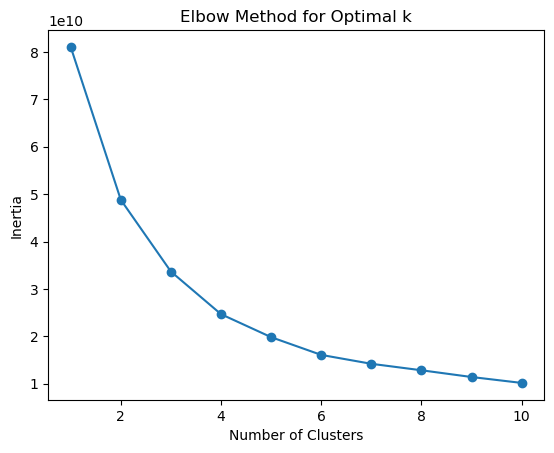

In [9]:
from sklearn.cluster import KMeans

# 클러스터링을 위한 변수 선택
features = ['오프라인비용', '온라인비용', '수량', '평균금액']

# 원-핫 인코딩된 데이터에 클러스터링 적용
k_values = range(1, 11)  # 시도할 클러스터 개수 범위

inertia = []  # 클러스터 내의 제곱 거리의 합을 저장할 리스트

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(marketing_cluster_df[features])
    inertia.append(kmeans.inertia_)

# 엘보우 메서드를 통한 적절한 클러스터 개수 선택
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [10]:
#클러스터링 진행
#K-means: 변수 간의 거리를 기반으로 그룹화

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler #표준화를 위한 임포트
sc = StandardScaler()
customer_clustering_sc = sc.fit_transform(marketing_cluster_df) #3행, 4행: 표준화 실행

kmeans = KMeans(n_clusters=4, random_state=0) #그룹화하고자 하는 수를 4개로 미리 지정
clusters = kmeans.fit(customer_clustering_sc) #모델 구축
marketing_cluster_df["marketing_cluster"] = clusters.labels_
print(marketing_cluster_df["marketing_cluster"].unique())
marketing_cluster_df.head()

C:\Users\82106\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[2 1 0 3]


C:\Users\82106\AppData\Local\Temp\ipykernel_15020\3580259772.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_cluster_df["marketing_cluster"] = clusters.labels_


,오프라인비용,온라인비용,수량,평균금액,marketing_cluster
0,4500,2424.5,1,153.71,2
1,4500,2424.5,1,153.71,2
2,4500,2424.5,2,122.77,2
3,4500,2424.5,1,81.50,1
4,4500,2424.5,1,153.71,2


In [11]:
marketing_cluster_df.groupby("marketing_cluster").mean() #클러스터 별 평균 금액

,오프라인비용,온라인비용,수량,평균금액
marketing_cluster,,,,
0,2237.655606,1373.518249,4.271563,23.451188
1,3391.187313,2520.371935,4.989350,20.656228
2,3121.064639,1968.457960,1.399087,143.101201
3,2845.535714,2059.119911,338.839286,4.343482


In [12]:
from sklearn.decomposition import PCA #주성분 분석 라이브러리
X = customer_clustering_sc
pca = PCA(n_components=2) #모델 생성
pca.fit(X) #4,5행: 주성분 분석 실행
x_pca = pca.transform(X)
pca_df = pd.DataFrame(x_pca)
pca_df["marketing_cluster"] = marketing_cluster_df["marketing_cluster"] #2차원으로 축소한 데이터를 pca_df에 저장하고, 위에서 작성한 클러스터링 결과도 저장

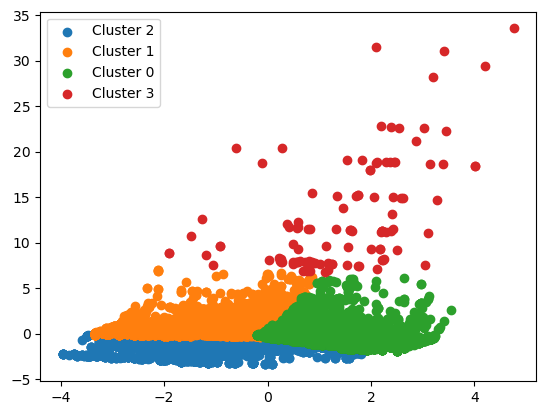

In [13]:
import matplotlib.pyplot as plt #시각화 라이브러리
%matplotlib inline
for i in marketing_cluster_df["marketing_cluster"].unique(): #그룹마다 색깔 다르게
    tmp = pca_df.loc[pca_df["marketing_cluster"]==i]
    plt.scatter(tmp[0], tmp[1], label=f'Cluster {i}') # 각 그룹에 레이블 추가

# 범례 추가
plt.legend()

plt.show()


In [14]:
marketing_clustering = pd.concat([marketing_cluster_df, result_df], axis=1) # customer_clustering에 customer 결합
marketing_clustering.groupby(["marketing_cluster","제품카테고리"],as_index=False).count()[["marketing_cluster","제품카테고리","고객ID"]] #cluster, 제품카테고리 별로 고객ID 개수 집계

,marketing_cluster,제품카테고리,고객ID
0,0,Accessories,107
1,0,Android,25
2,0,Apparel,10106
3,0,Backpacks,33
4,0,Bags,990
5,0,Bottles,156
6,0,Drinkware,1948
7,0,Fun,113
8,0,Gift Cards,41
9,0,Google,63


In [15]:
# 클러스터별로 제품 카테고리 별 고객ID 개수 계산
cluster_category_count = marketing_clustering.groupby(["marketing_cluster", "제품카테고리"], as_index=False).count()[["marketing_cluster", "제품카테고리", "고객ID"]]

# 상위 3개에서 5개까지만 선택
top_categories_per_cluster = cluster_category_count.groupby('marketing_cluster').apply(lambda x: x.nlargest(5, '고객ID')).reset_index(drop=True)

# 결과 출력
print(top_categories_per_cluster)

    marketing_cluster                제품카테고리   고객ID
0                   0               Apparel  10106
1                   0                Office   3669
2                   0              Nest-USA   2194
3                   0             Drinkware   1948
4                   0             Lifestyle   1719
5                   1               Apparel   7920
6                   1                Office   2781
7                   1             Drinkware   1523
8                   1             Lifestyle   1363
9                   1              Nest-USA   1130
10                  2              Nest-USA  10689
11                  2                  Nest   1771
12                  2           Nest-Canada    285
13                  2                  Bags    193
14                  2               Apparel     99
15                  3                Office     61
16                  3             Drinkware     12
17                  3             Lifestyle     10
18                  3  Notebook

### 쿠폰 클러스터링

C:\Users\82106\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\82106\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\82106\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\82106\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

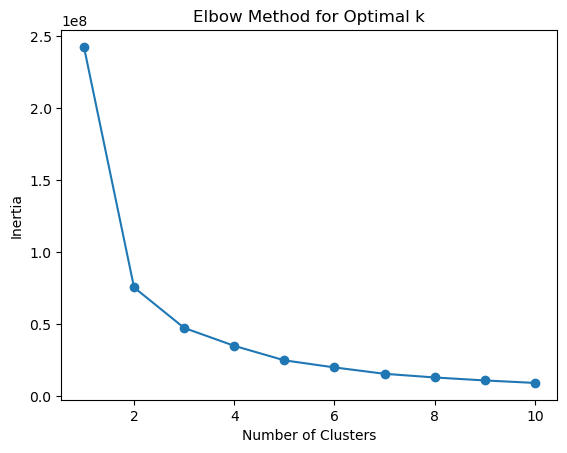

In [16]:
# 클러스터링을 위한 변수 선택
features = [ '할인율', '수량', '평균금액']

# 원-핫 인코딩된 데이터에 클러스터링 적용
k_values = range(1, 11)  # 시도할 클러스터 개수 범위

inertia = []  # 클러스터 내의 제곱 거리의 합을 저장할 리스트

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(coupon_cluster_df[features])
    inertia.append(kmeans.inertia_)

# 엘보우 메서드를 통한 적절한 클러스터 개수 선택
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [17]:
#클러스터링 진행
#K-means: 변수 간의 거리를 기반으로 그룹화

sc = StandardScaler()
customer_clustering_sc = sc.fit_transform(marketing_cluster_df) #3행, 4행: 표준화 실행

kmeans = KMeans(n_clusters=3, random_state=0) #그룹화하고자 하는 수를 4개로 미리 지정
clusters = kmeans.fit(customer_clustering_sc) #모델 구축
coupon_cluster_df["coupon_cluster"] = clusters.labels_
print(coupon_cluster_df["coupon_cluster"].unique())
coupon_cluster_df.head()

C:\Users\82106\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0 1 2]


C:\Users\82106\AppData\Local\Temp\ipykernel_15020\620685159.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coupon_cluster_df["coupon_cluster"] = clusters.labels_


,할인율,수량,평균금액,coupon_cluster
0,10.0,1,153.71,0
1,10.0,1,153.71,0
2,10.0,2,122.77,0
3,10.0,1,81.50,1
4,10.0,1,153.71,0


In [18]:
coupon_cluster_df.groupby("coupon_cluster").mean() #클러스터마다 집계

,할인율,수량,평균금액
coupon_cluster,,,
0,4.069202,1.399087,143.101201
1,3.352131,7.163130,20.550012
2,5.433925,4.271563,23.451188


# 쿠폰 클러스터 결과
cluster 0 :

In [19]:
X = customer_clustering_sc
pca = PCA(n_components=2) #모델 생성
pca.fit(X) #4,5행: 주성분 분석 실행
x_pca = pca.transform(X)
pca_df = pd.DataFrame(x_pca)
pca_df["coupon_cluster"] = coupon_cluster_df["coupon_cluster"] #2차원으로 축소한 데이터를 pca_df에 저장하고, 위에서 작성한 클러스터링 결과도 저장

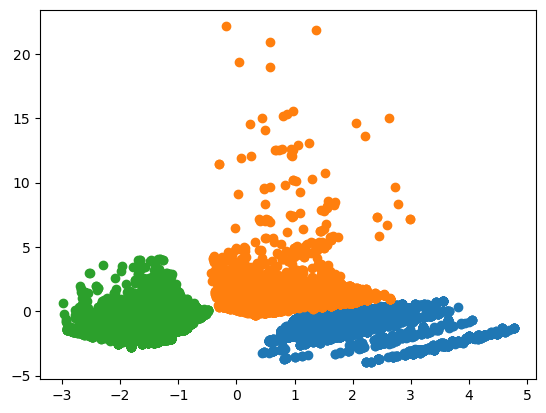

In [20]:
%matplotlib inline
for i in coupon_cluster_df["coupon_cluster"].unique(): #그룹마다 색깔 다르게
    tmp = pca_df.loc[pca_df["coupon_cluster"]==i]
    plt.scatter(tmp[0], tmp[1])

In [21]:
coupon_clustering = pd.concat([coupon_cluster_df, result_df], axis=1) # customer_clustering에 customer 결합
coupon_clustering.groupby(["coupon_cluster","쿠폰상태"],
                          as_index=False).count()[["coupon_cluster","쿠폰상태","고객ID"]] #cluster, 제품카테고리 별로 고객ID 개수 집계

,coupon_cluster,쿠폰상태,고객ID
0,0,Clicked,6753
1,0,Not Used,2042
2,0,Used,4355
3,1,Clicked,8722
4,1,Not Used,2626
5,1,Used,5853
6,2,Clicked,11451
7,2,Not Used,3426
8,2,Used,7696


In [22]:
# 클러스터별로 제품 카테고리 별 고객ID 개수 계산
cluster_category_count = coupon_clustering.groupby(["coupon_cluster","쿠폰상태"],as_index=False).count()[["coupon_cluster","쿠폰상태","고객ID"]]

# 상위 3개에서 5개까지만 선택
top_categories_per_cluster = cluster_category_count.groupby('coupon_cluster').apply(lambda x: x.nlargest(5, '고객ID')).reset_index(drop=True)

# 결과 출력
print(top_categories_per_cluster)

   coupon_cluster      쿠폰상태   고객ID
0               0   Clicked   6753
1               0      Used   4355
2               0  Not Used   2042
3               1   Clicked   8722
4               1      Used   5853
5               1  Not Used   2626
6               2   Clicked  11451
7               2      Used   7696
8               2  Not Used   3426


### 가입기간 클러스터링

C:\Users\82106\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\82106\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\82106\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\82106\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

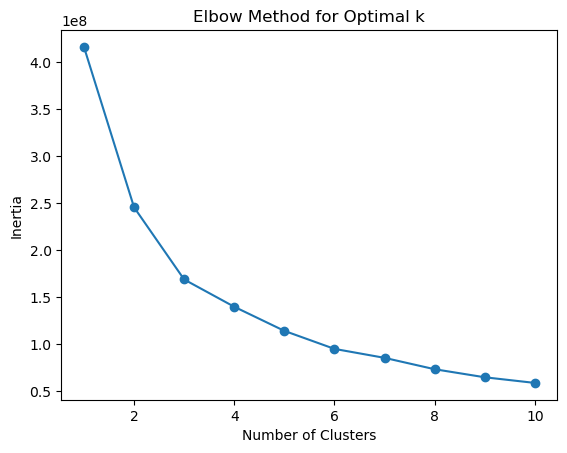

In [23]:
# 클러스터링을 위한 변수 선택
features = [ '가입기간', '월별_거래_횟수', '수량', '평균금액']

# 원-핫 인코딩된 데이터에 클러스터링 적용
k_values = range(1, 11)  # 시도할 클러스터 개수 범위

inertia = []  # 클러스터 내의 제곱 거리의 합을 저장할 리스트

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(transaction_duration_cluster_df[features])
    inertia.append(kmeans.inertia_)

# 엘보우 메서드를 통한 적절한 클러스터 개수 선택
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [24]:
sc = StandardScaler()
customer_clustering_sc = sc.fit_transform(transaction_duration_cluster_df) #3행, 4행: 표준화 실행

kmeans = KMeans(n_clusters=3, random_state=0) #그룹화하고자 하는 수를 4개로 미리 지정
clusters = kmeans.fit(customer_clustering_sc) #모델 구축
transaction_duration_cluster_df["transaction_duration_cluster"] = clusters.labels_
print(transaction_duration_cluster_df["transaction_duration_cluster"].unique())
transaction_duration_cluster_df.head()

C:\Users\82106\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[1 2 0]


C:\Users\82106\AppData\Local\Temp\ipykernel_15020\1472098256.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_duration_cluster_df["transaction_duration_cluster"] = clusters.labels_


,가입기간,월별_거래_횟수,수량,평균금액,transaction_duration_cluster
0,12,89,1,153.71,1
1,12,89,1,153.71,1
2,12,89,2,122.77,1
3,12,89,1,81.50,1
4,12,89,1,153.71,1


In [25]:
transaction_duration_cluster_df.groupby("transaction_duration_cluster").mean() #클러스터마다 집계

,가입기간,월별_거래_횟수,수량,평균금액
transaction_duration_cluster,,,,
0,13.308995,179.274121,4.534680,21.355537
1,26.787225,149.163959,1.400196,141.652210
2,36.922550,169.282737,6.613964,17.313404


In [26]:

X = customer_clustering_sc
pca = PCA(n_components=2) #모델 생성
pca.fit(X) #4,5행: 주성분 분석 실행
x_pca = pca.transform(X)
pca_df = pd.DataFrame(x_pca)
pca_df["transaction_duration_cluster"] = transaction_duration_cluster_df["transaction_duration_cluster"] #2차원으로 축소한 데이터를 pca_df에 저장하고, 위에서 작성한 클러스터링 결과도 저장

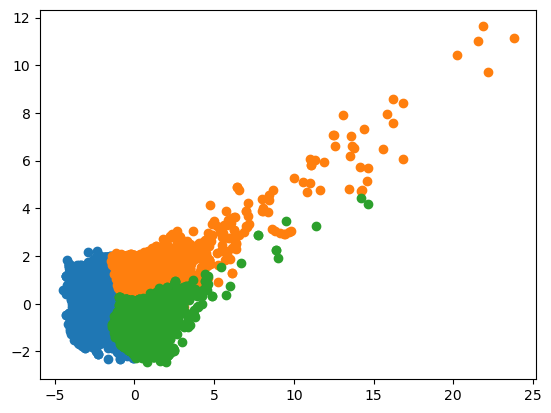

In [27]:
%matplotlib inline
for i in transaction_duration_cluster_df["transaction_duration_cluster"].unique(): #그룹마다 색깔 다르게
    tmp = pca_df.loc[pca_df["transaction_duration_cluster"]==i]
    plt.scatter(tmp[0], tmp[1])

In [28]:
reg_clustering = pd.concat([transaction_duration_cluster_df, result_df], axis=1) # customer_clustering에 customer 결합
reg_clustering.groupby(["transaction_duration_cluster","월"],as_index=False).count()[["transaction_duration_cluster","월","고객ID"]] #cluster, 제품카테고리 별로 고객ID 개수 집계

,transaction_duration_cluster,월,고객ID
0,0,Apr,1380
1,0,Aug,2616
2,0,Dec,1228
3,0,Feb,984
4,0,Jan,1330
5,0,Jul,2058
6,0,Jun,1326
7,0,Mar,1329
8,0,May,1954
9,0,Nov,1023


In [29]:
# 클러스터별로 제품 카테고리 별 고객ID 개수 계산
cluster_category_count = reg_clustering.groupby(["transaction_duration_cluster","월"],as_index=False).count()[["transaction_duration_cluster","월","고객ID"]]

# 상위 3개에서 5개까지만 선택
top_categories_per_cluster = cluster_category_count.groupby('transaction_duration_cluster').apply(lambda x: x.nlargest(5, '고객ID')).reset_index(drop=True)

# 결과 출력
print(top_categories_per_cluster)

    transaction_duration_cluster    월  고객ID
0                              0  Aug  2616
1                              0  Jul  2058
2                              0  May  1954
3                              0  Sep  1646
4                              0  Apr  1380
5                              1  Dec  1885
6                              1  Nov  1783
7                              1  Jan  1477
8                              1  Oct  1419
9                              1  Mar  1058
10                             2  Aug  2651
11                             2  Jul  2290
12                             2  Mar  1959
13                             2  Jun  1872
14                             2  Apr  1830


### 기간별 클러스터링

C:\Users\82106\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\82106\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\82106\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\82106\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

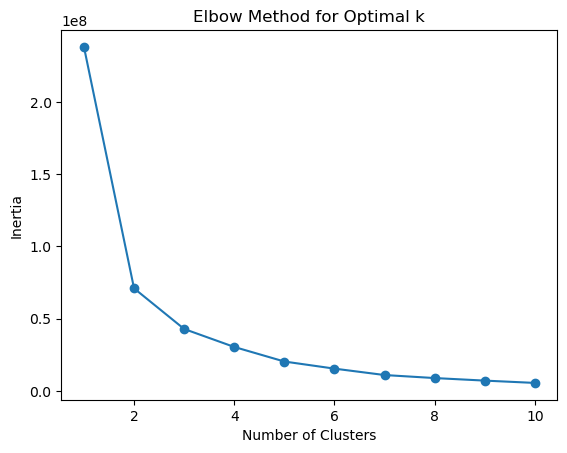

In [30]:
# 클러스터링을 위한 변수 선택
features = [ '수량', '평균금액']

# 원-핫 인코딩된 데이터에 클러스터링 적용
k_values = range(1, 11)  # 시도할 클러스터 개수 범위

inertia = []  # 클러스터 내의 제곱 거리의 합을 저장할 리스트

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(period_cluster_df[features])
    inertia.append(kmeans.inertia_)

# 엘보우 메서드를 통한 적절한 클러스터 개수 선택
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [31]:
sc = StandardScaler()
customer_clustering_sc = sc.fit_transform(period_cluster_df) #3행, 4행: 표준화 실행

kmeans = KMeans(n_clusters=2, random_state=0) #그룹화하고자 하는 수를 지정
clusters = kmeans.fit(customer_clustering_sc) #모델 구축
period_cluster_df["period_cluster"] = clusters.labels_
print(period_cluster_df["period_cluster"].unique())
period_cluster_df.head()

C:\Users\82106\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0 1]


C:\Users\82106\AppData\Local\Temp\ipykernel_15020\3095531574.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period_cluster_df["period_cluster"] = clusters.labels_


,수량,평균금액,period_cluster
0,1,153.71,0
1,1,153.71,0
2,2,122.77,0
3,1,81.50,0
4,1,153.71,0


In [32]:
period_cluster_df.groupby("period_cluster").mean() #클러스터마다 집계

,수량,평균금액
period_cluster,,
0,1.478698,133.18146
1,5.951790,13.24892


In [33]:
X = customer_clustering_sc
pca = PCA(n_components=2) #모델 생성
pca.fit(X) #4,5행: 주성분 분석 실행
x_pca = pca.transform(X)
pca_df = pd.DataFrame(x_pca)
pca_df["period_cluster"] = period_cluster_df["period_cluster"] #2차원으로 축소한 데이터를 pca_df에 저장하고, 위에서 작성한 클러스터링 결과도 저장

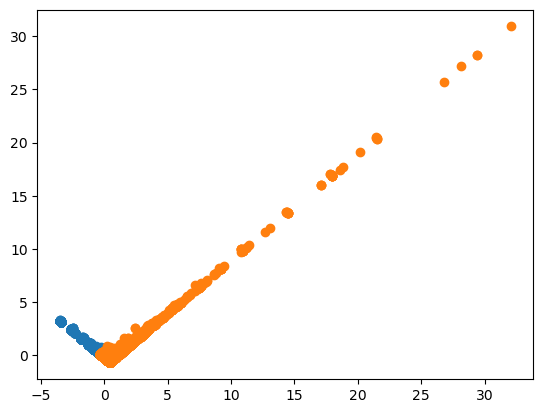

In [34]:
%matplotlib inline
for i in period_cluster_df["period_cluster"].unique(): #그룹마다 색깔 다르게
    tmp = pca_df.loc[pca_df["period_cluster"]==i]
    plt.scatter(tmp[0], tmp[1])

In [35]:
reg_clustering = pd.concat([period_cluster_df, result_df], axis=1) # customer_clustering에 customer 결합
reg_clustering.groupby(["period_cluster","월"],as_index=False).count()[["period_cluster","월","고객ID"]] #cluster, 제품카테고리 별로 고객ID 개수 집계

,period_cluster,월,고객ID
0,0,Apr,1093
1,0,Aug,1244
2,0,Dec,2225
3,0,Feb,1165
4,0,Jan,1689
5,0,Jul,1238
6,0,Jun,1160
7,0,Mar,1215
8,0,May,1042
9,0,Nov,2142


In [36]:
# 클러스터별로 제품 카테고리 별 고객ID 개수 계산
cluster_category_count = reg_clustering.groupby(["period_cluster","월"],as_index=False).count()[["period_cluster","월","고객ID"]]

# 상위 3개에서 5개까지만 선택
top_categories_per_cluster = cluster_category_count.groupby('period_cluster').apply(lambda x: x.nlargest(5, '고객ID')).reset_index(drop=True)

# 결과 출력
print(top_categories_per_cluster)

   period_cluster    월  고객ID
0               0  Dec  2225
1               0  Nov  2142
2               0  Oct  1707
3               0  Jan  1689
4               0  Sep  1285
5               1  Aug  4906
6               1  Jul  4013
7               1  May  3530
8               1  Mar  3131
9               1  Apr  3057


In [39]:
reg_clustering

,수량,평균금액,period_cluster,Unnamed: 0,고객ID,거래ID,날짜,제품ID,제품카테고리,수량,...,성별,고객지역,가입기간,오프라인비용,온라인비용,GST,쿠폰코드,할인율,월별_거래_횟수,월
0,1,153.71,0,0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,...,1,Chicago,12,4500,2424.50,0.1,ELEC10,10.0,89,Jan
1,1,153.71,0,1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,...,1,Chicago,12,4500,2424.50,0.1,ELEC10,10.0,89,Jan
2,2,122.77,0,2,USER_1358,Transaction_0013,2019-01-01,Product_0983,Nest-USA,2,...,1,Chicago,12,4500,2424.50,0.1,ELEC10,10.0,89,Jan
3,1,81.50,0,3,USER_1358,Transaction_0015,2019-01-01,Product_0984,Nest-USA,1,...,1,Chicago,12,4500,2424.50,0.1,ELEC10,10.0,89,Jan
4,1,153.71,0,4,USER_1358,Transaction_0016,2019-01-01,Product_0981,Nest-USA,1,...,1,Chicago,12,4500,2424.50,0.1,ELEC10,10.0,89,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,1,3.99,1,52919,USER_0749,Transaction_20328,2019-11-04,Product_0871,Accessories,1,...,0,New Jersey,35,2000,2478.79,0.1,0,0.0,73,Nov
52920,1,3.99,1,52920,USER_1115,Transaction_20316,2019-11-04,Product_0871,Accessories,1,...,1,Washington DC,47,2000,2478.79,0.1,0,0.0,73,Nov
52921,1,3.99,1,52921,USER_1036,Transaction_18087,2019-10-02,Product_0871,Accessories,1,...,0,New York,11,3000,899.05,0.1,0,0.0,137,Oct
52922,1,13.59,1,52922,USER_1295,Transaction_18516,2019-10-09,Product_1016,Accessories,1,...,1,New York,26,3500,734.31,0.1,0,0.0,160,Oct


In [ ]:
# '고객ID' 칼럼만을 가진 데이터프레임 생성
df = result_df[['고객ID']]

# 다른 데이터프레임과 병합
merged_df = df.merge(marketing_cluster, on='고객ID', how='inner')
merged_df = merged_df.merge(coupon_clustering, on='고객ID', how='inner')
merged_df = merged_df.merge(reg_clustering, on='고객ID', how='inner')
merged_df = merged_df.merge(reg_clustering, on='고객ID', how='inner')
 reg_clustering의 transaction_duration_cluster